<a href="https://colab.research.google.com/github/uofldmlab/IntroDMLab/blob/main/demo_lab_01_SOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Click the Google Colab image at the top of the page to launch the lab in Google Colab:*screenshot-2021-09-08-9-15-39- (1).png

The following link provides a brief tutorial on how to use Google Colab: [https://www.youtube.com/watch?v=inN8seMm7UI&ab_channel=TensorFlow](https://www.youtube.com/watch?v=inN8seMm7UI&ab_channel=TensorFlow)

#Lab #01: Exploring Data

# Import Python Libraries

Importing Python libraries extend data-type and function capabilities that are outside the core Python language. The Pandas library is a Python library that is widely used to open, view, manipulate, and analyze data.

In [19]:
import pandas as pd #import pandas

# Open Data
We will use the pandas read_csv() function to import a CSV file from a URL and store the data into a Pandas dataframe.

In this case we are reading a comma delimited text file (.csv) from: https://raw.githubusercontent.com/uofldmlab/IntroDMLab/main/insurance.csv

This particular text file contains data related to medical charges. The dataset contains 7 different variables; 6 independent (age, BMI, sex, smoker, children, region); 1 dependent (charges).


In [20]:
#open datafile and store into Pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/uofldmlab/IntroDMLab/main/insurance1.csv")

#Data Types
The dtypes attribute of the Pandas dataframe provides the datatypes of each of the fields in the dataframe.  In this example both *int64* and *float64* represent numeric data, while *object* represents non-numeric (string/categorical)

In [21]:
df.dtypes

Unnamed: 0      int64
age             int64
sex            object
bmi           float64
children        int64
smoker         object
region         object
charges       float64
dtype: object

#Display Data
The Pandas dataframe provides a data structure of rows and columns of the dataset we read in. The *head()* function is used to display the first few rows of the dataframe.

In [22]:
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.90,0,yes,southwest,16884.92
1,1,18,male,33.77,1,no,southeast,1725.55
2,2,28,male,33.00,3,no,southeast,4449.46
3,3,33,male,22.70,0,no,northwest,21984.47
4,4,32,male,28.88,0,no,northwest,3866.86


By default the *head()* function will display the 5 rows of the dataframe, but additional rows can be displayed by supplying the desired number of rows as a parameter.

In [23]:
df.head(10)

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.90,0,yes,southwest,16884.92
1,1,18,male,33.77,1,no,southeast,1725.55
2,2,28,male,33.00,3,no,southeast,4449.46
3,3,33,male,22.70,0,no,northwest,21984.47
4,4,32,male,28.88,0,no,northwest,3866.86
5,5,31,female,25.74,0,no,southeast,3756.62
6,6,46,female,33.44,1,no,southeast,8240.59
7,7,37,female,27.74,3,no,northwest,7281.51
8,8,37,male,29.83,2,no,northeast,6406.41
9,9,60,female,25.84,0,no,northwest,28923.14


Only desired columns can be displayed by supplying column names.

In [24]:
df[['age','bmi']].head()

,age,bmi
0,19,27.90
1,18,33.77
2,28,33.00
3,33,22.70
4,32,28.88


#Dataframe Size
The *shape*  of the Pandas dataframe provides the number of records and the number of columns in the form of (rows, columns).

In [25]:
df.shape

(1338, 8)

#Filtering Data

Select rows can be filtered.  For instance is we only wanted to display only the rows where the sex=='male'. 

In [26]:
df[df['sex']=='male']

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
1,1,18,male,33.77,1,no,southeast,1725.55
2,2,28,male,33.00,3,no,southeast,4449.46
3,3,33,male,22.70,0,no,northwest,21984.47
4,4,32,male,28.88,0,no,northwest,3866.86
8,8,37,male,29.83,2,no,northeast,6406.41
...,...,...,...,...,...,...,...,...
1324,1324,31,male,25.94,1,no,northwest,4239.89
1325,1325,61,male,33.53,0,no,northeast,13143.34
1327,1327,51,male,30.03,1,no,southeast,9377.90
1329,1329,52,male,38.60,2,no,southwest,10325.21


The following shows how to display records where the medical charges were less than $2,000. Standard boolean operators can be used here (==, !=, <=, >=, <, >)

In [27]:
df[df['charges']<2000]

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
1,1,18,male,33.77,1,no,southeast,1725.55
12,12,23,male,34.40,0,no,southwest,1826.84
15,15,19,male,24.60,1,no,southwest,1837.24
22,22,18,male,34.10,0,no,southeast,1137.01
35,35,19,male,20.42,0,no,northwest,1625.43
...,...,...,...,...,...,...,...,...
1295,1295,20,male,22.00,1,no,southwest,1964.78
1296,1296,18,male,26.12,0,no,northeast,1708.93
1316,1316,19,female,20.60,0,no,southwest,1731.68
1317,1317,18,male,53.13,0,no,southeast,1163.46


We can also use the AND (&) and OR (|) operators to filter on multiple conditions.  For instance if we want to know how many men are younger than 19 in the dataset:

In [28]:
len(df[(df['sex']=='male')&(df['age']<19)])

36

Note the use of the *len()* function to obtain the number of rows in the result of the filtered dataframe.

#Describe the Data
The describe() function of the Pandas dataframe provides the numeric descriptive statistics of all of the numeric columns.

Below is a description of the output:

count - Count number of non-NA/null observations.

mean - Mean of the values.

std - Standard deviation of the observations.

min - Minimum of the values in the object.

25% - lower 25 percentile

50% - 50th percentile (median)

75% - upper 75th percentile 

max - Maximum of the values in the object.

In [29]:
df.describe()

,Unnamed: 0,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663572,1.094918,13270.422280
std,386.391641,14.049960,6.097951,1.205493,12110.011259
min,0.000000,18.000000,15.960000,0.000000,1121.870000
25%,334.250000,27.000000,26.297500,0.000000,4740.287500
50%,668.500000,39.000000,30.400000,1.000000,9382.030000
75%,1002.750000,51.000000,34.692500,2.000000,16639.915000
max,1337.000000,64.000000,53.130000,5.000000,63770.430000


#Describe the Data (with groupby)
By using the groupby() function on the dataframe we can compare the descriptive statistics of BMI between each of the values of the "sex" field.

In [30]:
df.groupby(["sex"])['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.578716,11128.703798,1607.51,4885.1625,9412.960,14454.690,63770.43
male,676.0,13956.751331,12971.025945,1121.87,4619.1350,9369.615,18989.595,62592.87


#Boxplot
By using the boxplot function we can compare BMI between the "sex" values.  This graph provides the ability to examine and compare means and interquartile range between the groups.  Additionally, we can find the outliers in the data by looking for the circles on the plot. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


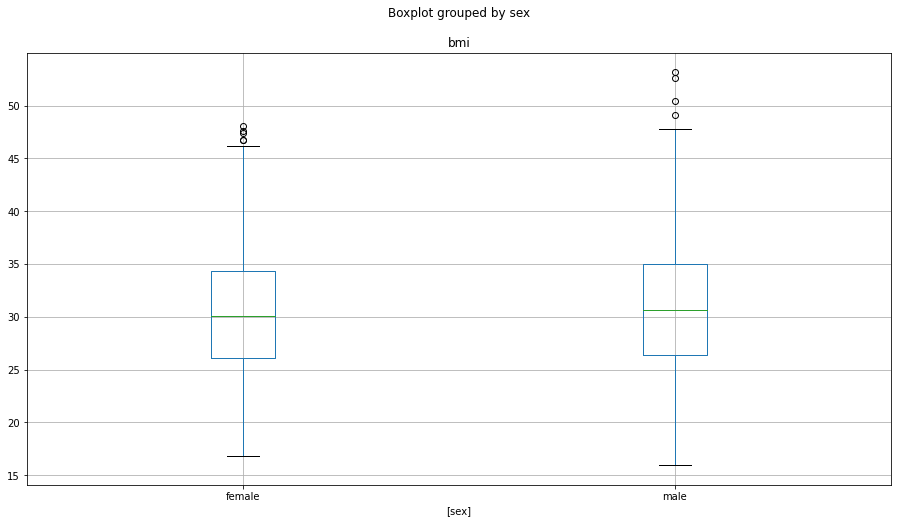

In [31]:
df[['sex','bmi']].boxplot(by="sex",figsize=(15, 8))

#Histogram

The histogram plot displays the distribution of a given variable.  

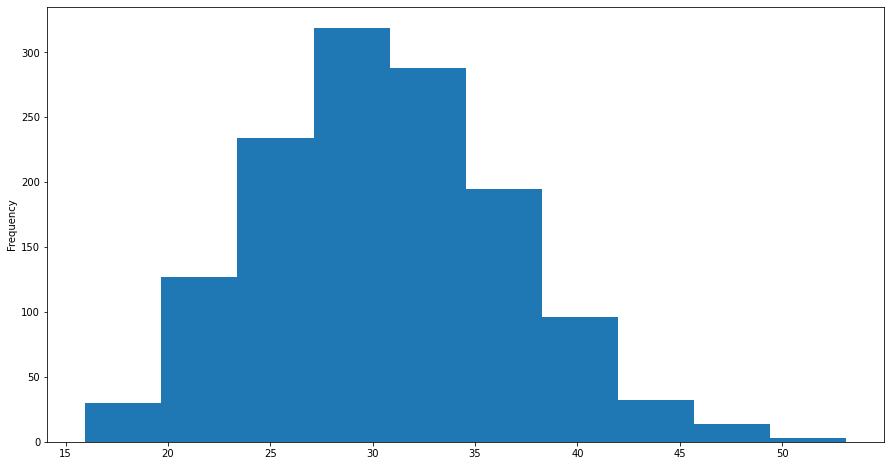

In [32]:
ax = df['bmi'].plot.hist(figsize=(15, 8))

#Lab Task #1: Filtering Columns
Filter the Pandas frame so that the resulting dataframe only contains female smokers.

In [33]:
df[(df['sex']=='female')&(df['smoker']=='yes')]

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.90,0,yes,southwest,16884.92
11,11,62,female,26.29,0,yes,southeast,27808.73
23,23,34,female,31.92,1,yes,northeast,37701.88
58,58,53,female,22.88,1,yes,southeast,23244.79
64,64,20,female,22.42,0,yes,northwest,14711.74
...,...,...,...,...,...,...,...,...
1308,1308,25,female,30.20,0,yes,southwest,33900.65
1313,1313,19,female,34.70,2,yes,southwest,36397.58
1314,1314,30,female,23.66,3,yes,northwest,18765.88
1323,1323,42,female,40.37,2,yes,southeast,43896.38


#Lab Task #2: Descriptive Statistics
Compare the desscriptive statistics of medical charges for the smokers versus the non-smokers.

In [35]:
df.groupby(["smoker"])['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268299,5993.781789,1121.87,3986.4425,7345.405,11362.890,36910.61
yes,274.0,32050.231898,11541.547246,12829.46,20826.2450,34456.350,41019.205,63770.43


#Lab Task #3: Box Plot
Compare BMI of smokers vs. non-smokers using a box plot.



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


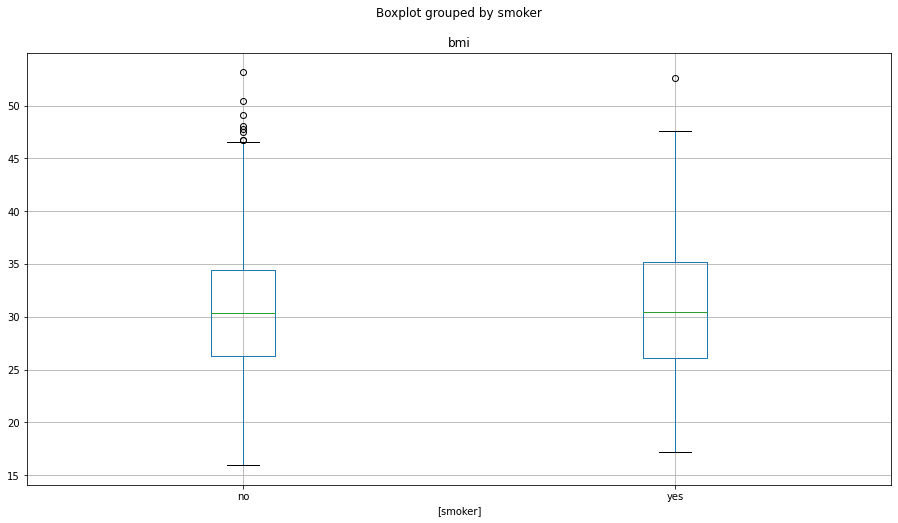

In [38]:
df[['smoker','bmi']].boxplot(by="smoker",figsize=(15, 8))

#Questions

Q1. How many female smokers are in the dataset?

115

Q2. What are the mean and standard deviation of BMI for smokers and non-smokers?

non-smoker: mean=8434.268299, stddv=5993.781789

smoker: mean=32050.231898, stddv=11541.547246	

Q3. How many BMI outliers exist in smokers vs non-smokers?

8

**Email your responses to Questions #1-#3 to your instructor.**